## 컨볼루션 신경망(CNN)

컨볼루션 신경망
- 합성곱신경망
- 주로 시각적 이미지를 분석하는 데 사용
- 영상에서 객체, 얼굴, 장면등의 패턴을 찾을 때 유용
- 오디오, 시계열, 신호 데이터 등 영상 이외의 데이터 분류에도 효과적

- 입력된 이미지에서 다시 한번 특징을 추출하기 위해 
    - 마스크(필터, 윈도 또는 커널이라고도 함)를 도입하는 기법

### 간단한 convenets 예제

- 딥러닝3_손글씨 숫자 분류 예제를 convents을 사용
    - 완전 연결네트워크 사용시 정확도가 97.8%였음 

### 기본적인 convernets 코드

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models

- input_shape = (이미지높이, 이미지넓이, 이미지채널)
- 흑백이미지는 채널이 1, 컬러이미지는 채널 3

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2,))
model.add(layers.Conv2D(62, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2,))
model.add(layers.Conv2D(62, (3,3), activation = 'relu'))

**컨브넷 구조 출력**

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 62)        17918     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 62)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 62)          34658     
                                                                 
Total params: 52896 (206.62 KB)
Trainable params: 5289

### 기본 개념  

- 컨볼루션(합성곱)  
- 풀링(Pooling)   
- 드롭아웃(drop out)  

### 컨볼루션(합성곱) 층

#### 일반적인 신경망

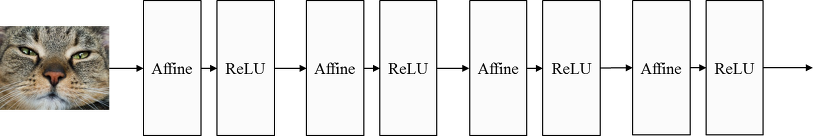

CNN
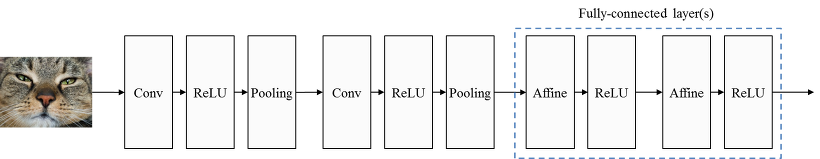

- 합성곱 계층(conv2D)은 이미지에 **필터링 기법을 적용**하고, 
- 풀링 계층(MaxPooling2D)은 이미지의 **국소적인 부분들을 하나의 대표적인 스칼라 값으로 변환**함으로써 
 - **이미지의 크기를 줄이는 등의 다양한 기능들을 수행**한다.

#### 이미지 텐서
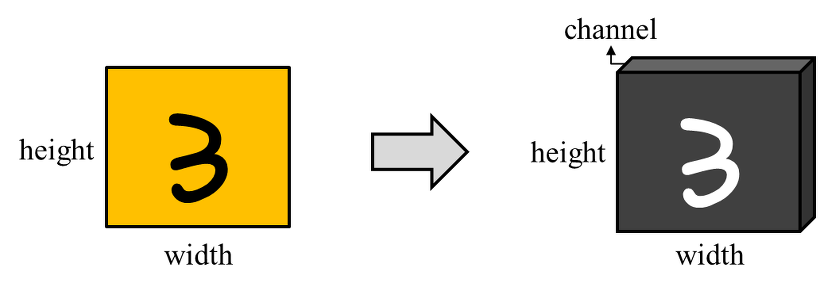

- 하나의 합성곱 계층에는 입력되는 이미지의 채널 개수만큼 필터가 존재
- 채널에 할당된 필터를 적용함으로써 합성곱 계층의 출력 이미지가 생성

In [7]:
# ! pip install opencv-python 
# 설치

In [21]:
import cv2

In [22]:
#IMREAD_COLOR : 이미지 파일을 Color로 읽어오기
img_color = cv2.imread('./data/11.png', cv2.IMREAD_COLOR)

In [24]:
img_b, img_g, img_r = cv2.split(img_color) # 칼라 이미지를 채널별로 분리
# opencv는 이미지채널을 BGR 순서로 저장하고 있음

In [27]:
cv2.imshow("BGR", img_color)
cv2.imshow("B", img_b)
cv2.imshow("G", img_g)
cv2.imshow("R", img_r)
cv2.waitKey(0)

-1

In [34]:
import cv2
import numpy as np

#IMREAD_COLOR : 이미지 파일을 Color로 읽어오기
img_color = cv2.imread('./data/11.png', cv2.IMREAD_COLOR)
img_b, img_g, img_r = cv2.split(img_color) # 칼라 이미지를 채널별로 분리
# opencv는 이미지채널을 BGR 순서로 저장하고 있음

zeros = np.zeros((img_color.shape[0], img_color.shape[1]), dtype = "uint8")
# img_color.shape
# img_b.shape
img_b = cv2.merge([img_b, zeros, zeros])
img_g = cv2.merge([zeros, img_g, zeros])
img_r = cv2.merge([zeros, zeros, img_r])

In [35]:
cv2.imshow("BGR", img_color)
cv2.imshow("B", img_b)
cv2.imshow("G", img_g)
cv2.imshow("R", img_r)
cv2.waitKey(0)

-1

### 이미지 필터 처리 기능
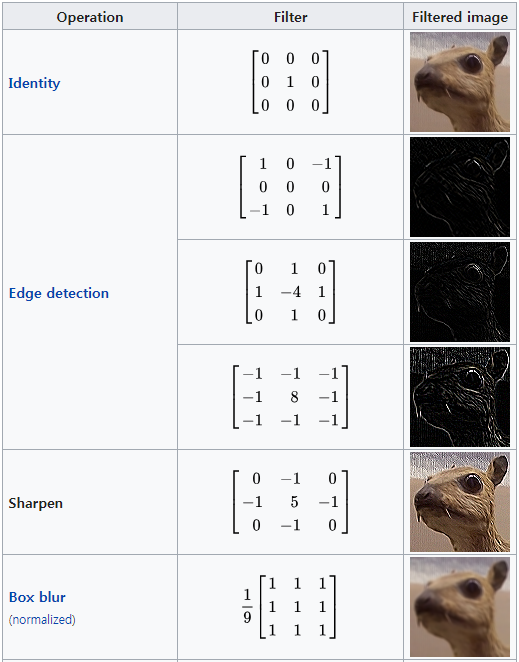

#### 컨볼루션(합성곱) 층 
- 입력된 이미지에
- 커널(마스크, 필터)을 적용하여
- 새로 계산된 가중치 값을 갖는 새로운 층 생성
- 컨볼루션을 만들면 입력 데이터로부터 더 정교한 특징 추출 가능
- 여러 개의 커널을 적용할 경우 여러 개의 컨볼루션 생성


적용된 부분은 원래 있던 값에 가중치의 값을 곱해 줌    
(1 x 1) + (0 x 0) + (0 x 0) + (1 x 1) = 2 

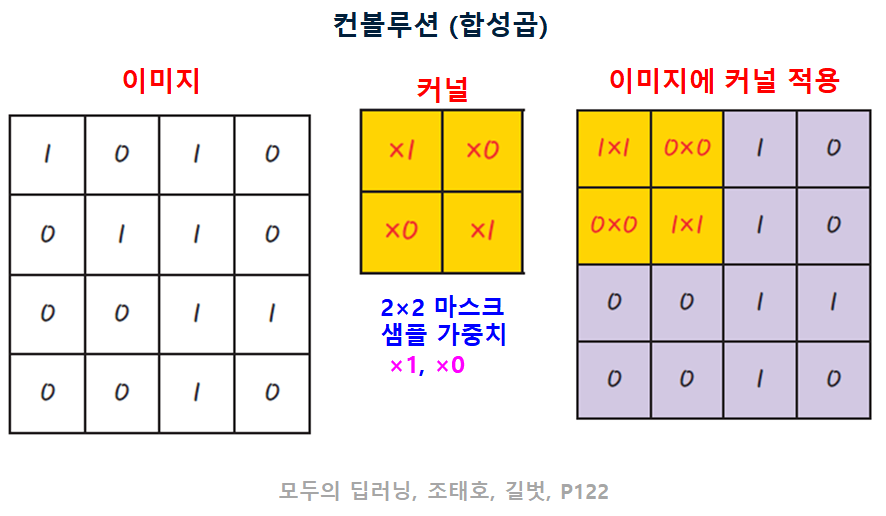

이 마스크를 한 칸씩 옮겨 적용 --> 새롭게 만들어진 층을 컨볼루션(합성곱) 이라고 함 

**스트라이드(stride)**
- 필터를 적용하는 위치의 간격
- 보폭
- 아래 그림은 스트라이드가 1인 경우

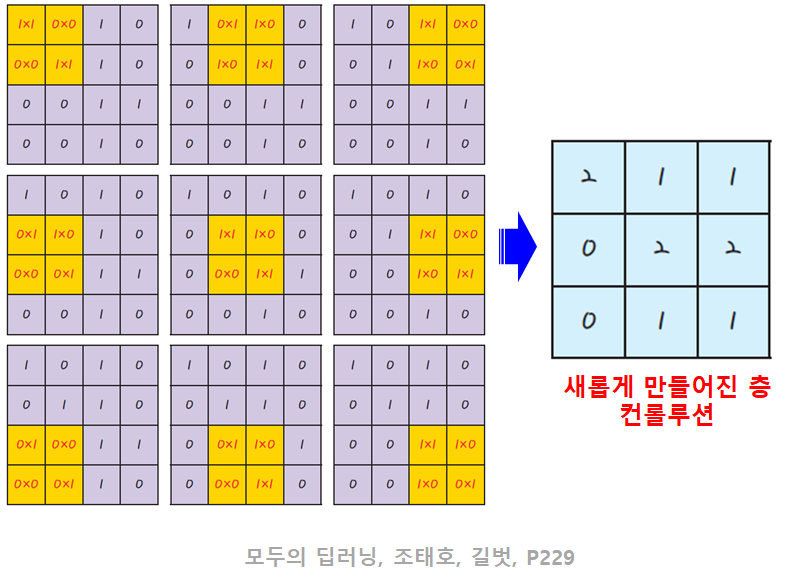

이러한 커널을 여러 개 만들 경우 여러 개의 컨볼루션이 만들어짐

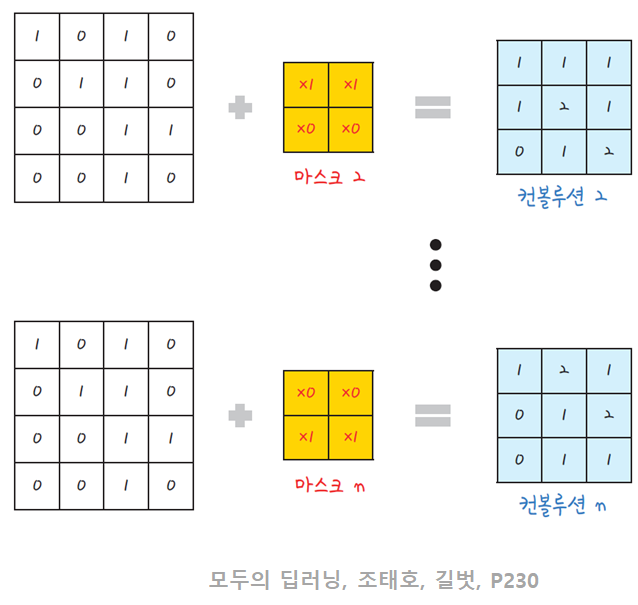

**케라스에서 컨볼루션 층을 추가하는 함수 : Conv2D()**  
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))

Conv2D() 함수 인자  
- 커널 수
- 커널 크기 : kernel_size=(3, 3) (3x3 크기)
- 입력값 : input_shape=(28, 28, 1) (행, 열, 색상 또는 흑백) (컬러:3, 흑백:1)
- 활성화 함수 : activation='relu'

풀링(Pooling) 또는 서브 샘플링(Sub Sampling)
- 컨볼루션 층을 통해 도출한 결과가 크고 복잡한 경우 축소하는 과정
- 맥스 풀링 (Max Pooling) : 정해진 구역 안에서 최대값 추출
- 평균 풀링 (average pooling) : 평균값 추출

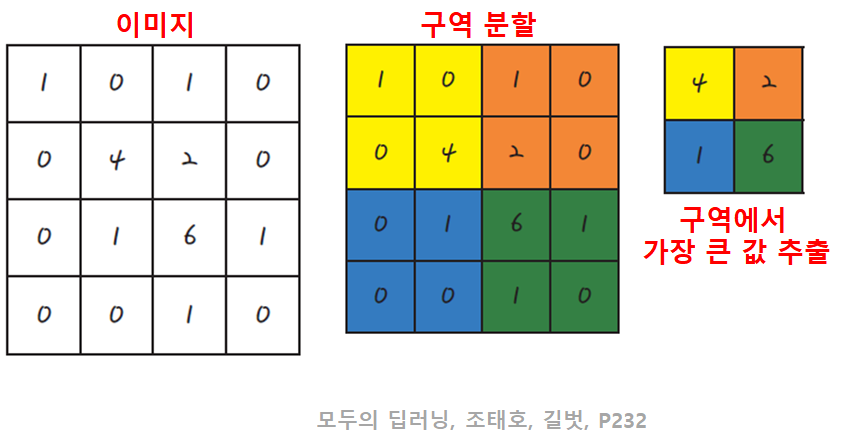

### **이 과정을 거쳐 불필요한 정보를 간추림**

**맥스 풀링**
- CNN은 주로 Maxpooling을 사용
- MaxPooling2D() 함수 사용
- model.add(MaxPooling2D(pool_size=2))

- 여기서 pool_size는 풀링 창의 크기를 정하는 것으로,   
    - 수직, 수평 축소 비율을 지정
    - 2로 정하면 전체 크기가 절반으로 줄어듦
    - pool_size : 수직, 수평 축소 비율을 지정합니다.
    
- (2, 2)이면 출력 영상 크기는 입력 영상 크기의 반으로 줄어들게 되고
    - 가장 큰값만 추출   
    
    
    
- tip.AveragePooling2D() 함수 : average-pooling시 사용

**드롭아웃, 플래튼 : 딥러닝 학습을 실행할 때 가장 중요한 것**
- 과적합을 얼마나 효과적으로 피해가는지에 달려 있다고 해도 과언이 아님
- 그동안 이러한 과정을 도와주는 기법이 연구되어 옴

**드롭아웃(drop out)**   
- 드롭아웃은 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것
- 간단하지만 효과가 큰 기법
- 랜덤하게 노드를 끔으로써 학습 데이터에 지나치게 치우쳐서 학습되는 과적합을 방지할 수 있음
- 케라스는 이를 손쉽게 적용하도록 도와줌
- model.add(Dropout(0.25)) : 25%의 노드를 끔 
    
**플래튼 (Flatten)**
- 2차원 배열을 1차원으로 바꿔줌
- model.add(Flatten())
- **컨볼루션 층이나 맥스 풀링층은 주어진 이미지를 2차원 배열 형태**로 다룸
- 이제 이러한 과정을 지나 
- 다시 앞에서 **Dense( ) 함수를 이용해 만들었던 기본 층에 연결**할 때 
    - 주의할 점은 이를 1차원 배열로 바꿔주어야 활성화 함수가 있는 층에서 사용할 수 있음
- Flatten( ) 함수를 사용해 2차원 배열을 1차원으로 바꿔줌
- model.add(Flatten())

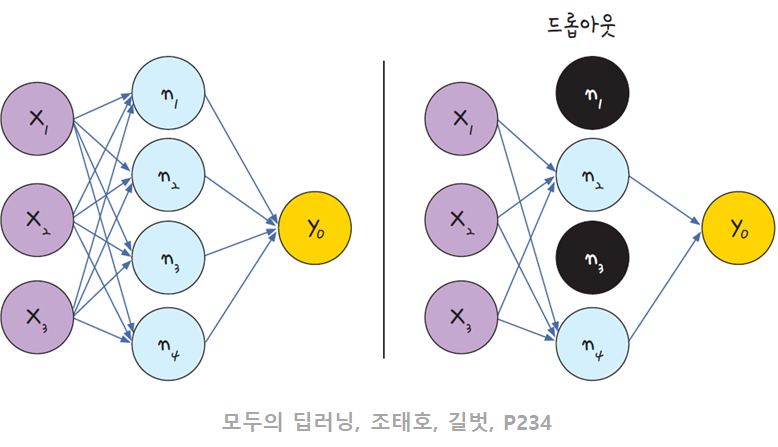

#### 그림 : 드롭아웃과 플래튼이 추가된 신경망

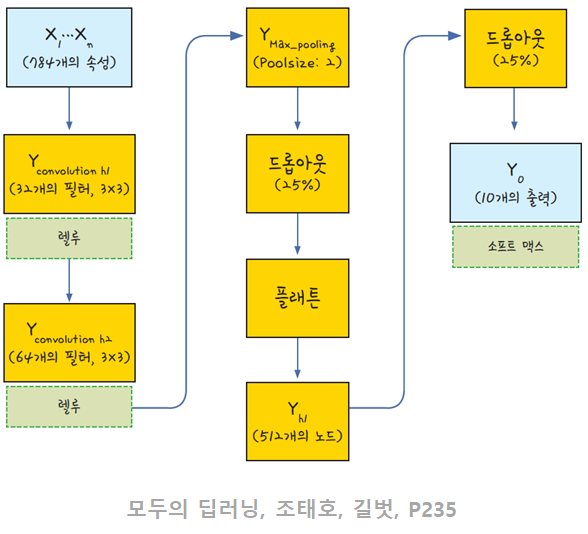

#### MNIST 이미지 인식에 컨볼루션 신경망 적용

In [36]:
# 이미지 데이터 로드 및 전처리

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 정규화
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 원-핫 인코딩 (바이너리화)
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [42]:
import tensorflow as tf
tf.random.set_seed(3)

In [45]:
# (1) 모델 설정 : 컨볼루션 신경망 설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,AveragePooling2D

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2,))
model.add(layers.Conv2D(62, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2,))
# model.add(layers.Conv2D(62, (3,3), activation = 'relu'))
model.add(Dropout(0.25))
model.add(Flatten()) # 특성맵 1차원 변환
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [47]:
# (2) 모델 컴파일
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [48]:
# 모델 저장 : model 디렉터리 생성

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# model 안에 파일로 저장
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# EarlyStopping : 모델 최적화 단계에서 학습 자동 중단 설정  
checkpointer = ModelCheckpoint(filepath = modelpath,
                              monitor = 'val_loss',
                              verbose = 1,
                              save_best_only = True)
early_stopping_clbk = EarlyStopping(monitor = 'val_loss', patience = 10)

In [49]:
# (3) 모델의 실행 (학습)
history = model.fit(X_train, Y_train,
                   validation_data = (X_test, Y_test),
                   epochs = 30, batch_size = 200,
                   callbacks = [early_stopping_clbk, checkpointer])
## 실행 중 중단 시켰음 - 아래 오류

Epoch 1/30
299/300 [============================>.] - ETA: 0s - loss: 0.3713 - accuracy: 0.8853
Epoch 1: val_loss improved from inf to 0.07601, saving model to ./model\01-0.0760.hdf5
300/300 [==============================] - 12s 37ms/step - loss: 0.3704 - accuracy: 0.8856 - val_loss: 0.0760 - val_accuracy: 0.9758
Epoch 2/30
  3/300 [..............................] - ETA: 10s - loss: 0.1212 - accuracy: 0.9717

C:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


299/300 [============================>.] - ETA: 0s - loss: 0.1171 - accuracy: 0.9654
Epoch 2: val_loss improved from 0.07601 to 0.04769, saving model to ./model\02-0.0477.hdf5
300/300 [==============================] - 11s 36ms/step - loss: 0.1171 - accuracy: 0.9654 - val_loss: 0.0477 - val_accuracy: 0.9841
Epoch 3/30
299/300 [============================>.] - ETA: 0s - loss: 0.0864 - accuracy: 0.9744
Epoch 3: val_loss improved from 0.04769 to 0.03988, saving model to ./model\03-0.0399.hdf5
300/300 [==============================] - 11s 35ms/step - loss: 0.0863 - accuracy: 0.9744 - val_loss: 0.0399 - val_accuracy: 0.9857
Epoch 4/30
299/300 [============================>.] - ETA: 0s - loss: 0.0731 - accuracy: 0.9784
Epoch 4: val_loss improved from 0.03988 to 0.03347, saving model to ./model\04-0.0335.hdf5
300/300 [==============================] - 11s 37ms/step - loss: 0.0733 - accuracy: 0.9784 - val_loss: 0.0335 - val_accuracy: 0.9880
Epoch 5/30
299/300 [============================>.]

300/300 [==============================] - 12s 39ms/step - loss: 0.0151 - accuracy: 0.9947 - val_loss: 0.0207 - val_accuracy: 0.9939


In [58]:
# (4) 학습 평가 : 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0207 - accuracy: 0.9939

 Test Accuracy: 0.9939


In [56]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

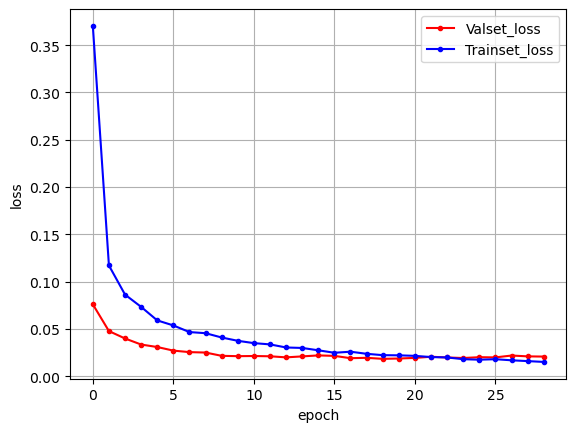

In [57]:
import numpy 
import matplotlib.pyplot as plt
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Valset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

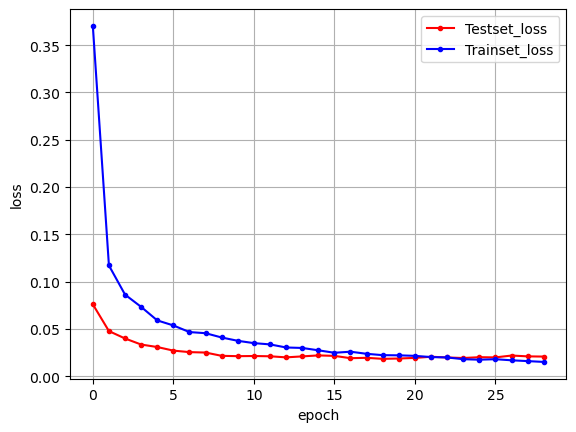

In [59]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()